In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as mlp
import seaborn as sns

In [2]:
dataset = pd.read_csv('C://Users//Akhila Potla//OneDrive//Desktop//major project//clinvar_conflicting.csv')

C:\Users\Akhila Potla\AppData\Local\Temp\ipykernel_4584\1470905193.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('C://Users//Akhila Potla//OneDrive//Desktop//major project//clinvar_conflicting.csv')


In [3]:
dataset

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


In [4]:
dataset.head(5)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [5]:
dataset.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [6]:
dataset.shape

(65188, 46)

In [7]:
dataset.drop(['CLNDISDBINCL','DISTANCE','CLNDNINCL','CLNSIGINCL','SSR','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE'],axis=1,inplace=True)

In [8]:
dataset.drop(['ALT','REF'],axis=1,inplace=True)

In [9]:
dataset

,CHROM,POS,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,...,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,0.0771,0.10020,0.1066,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,...,E/D,gaG/gaC,1.0,NaN,tolerated,benign,NaN,1.053,-0.208682,2.0
1,1,1470752,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,...,P/L,cCg/cTg,-1.0,OK,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0
2,1,1737942,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,...,I/T,aTc/aCc,-1.0,OK,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0
3,1,2160305,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,...,G/S,Ggc/Agc,1.0,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,...,G/C,Ggc/Tgc,1.0,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",Hereditary_factor_VIII_deficiency_disease|not_...,NC_000023.10:g.154158201T>G,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,S,tcA/tcC,-1.0,OK,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154159118C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,V/I,Gta/Ata,-1.0,OK,tolerated,benign,0.00158,0.002,-1.731470,3.0
65185,X,154194886,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154194886C>T,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",...,A,gcG/gcA,-1.0,OK,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",Non-syndromic_X-linked_intellectual_disability...,NC_000023.10:g.154490187T>C,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",...,T,acA/acG,-1.0,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


In [10]:
df = pd.DataFrame(dataset)
df['CHROM'].replace({'X': '0'}, inplace=True)
df['CHROM'].replace({'MT': '0'}, inplace=True)
y=df.iloc[:,:5].values
x=df.iloc[:,:1].values

In [11]:
x.shape

(65188, 1)

In [12]:
y.shape

(65188, 5)

In [13]:
df = pd.DataFrame(dataset)
df['CHROM'].replace({'X': '0'}, inplace=True)
Y=df.iloc[:,[0]].values.astype('float')
X=df.iloc[:,:1].values.astype('float')

In [14]:
X.shape

(65188, 1)

In [15]:
Y.shape

(65188, 1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [17]:
x_train.shape

(45631, 1)

In [18]:
y_train.shape

(45631, 1)

In [19]:
x_test.shape

(19557, 1)

In [20]:
y_test.shape

(19557, 1)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=5)
pca.fit(y)
x_pca=pca.transform(y)

In [23]:
data1=pd.DataFrame(x_pca,columns=['X{}'.format(i+1)for i in range(5)])

In [24]:
data1

,X1,X2,X3,X4,X5
0,-7.640776e+07,12.871529,0.137190,0.013397,-0.015691
1,-7.610519e+07,12.854560,-0.026912,-0.000399,-0.000571
2,-7.583800e+07,12.839598,-0.026906,-0.000404,-0.000577
3,-7.541563e+07,12.815948,-0.026913,-0.000399,-0.000570
4,-7.541563e+07,12.815948,-0.026913,-0.000399,-0.000570
...,...,...,...,...,...
65183,7.658226e+07,5.304799,0.192519,0.038684,-0.041987
65184,7.658318e+07,5.304713,-0.025042,-0.000215,0.000638
65185,7.661895e+07,5.302712,-0.011604,0.002601,0.005872
65186,7.691425e+07,5.286174,-0.026911,-0.000547,-0.000385


In [25]:
data1.isnull().any()

X1    False
X2    False
X3    False
X4    False
X5    False
dtype: bool

In [26]:
data1.skew()

X1    0.802931
X2    0.432327
X3    5.063462
X4    1.238126
X5    1.163585
dtype: float64

In [27]:
dataset.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65174.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.342486,0.252102,-0.006659,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.688772,0.434223,0.999985,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,0.000000,-1.000000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.000000,1.000000,1.000000,99.000000,46.556261,3.000000


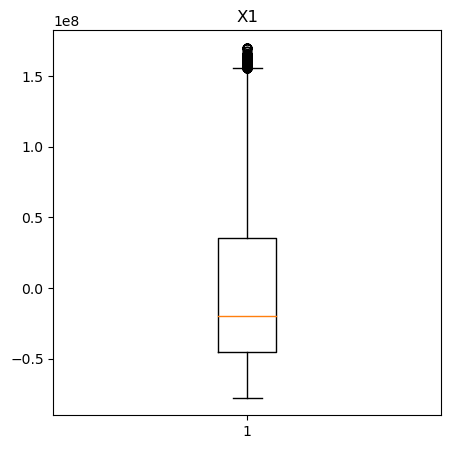

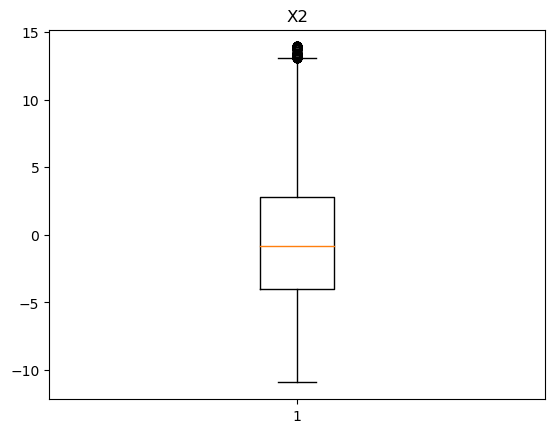

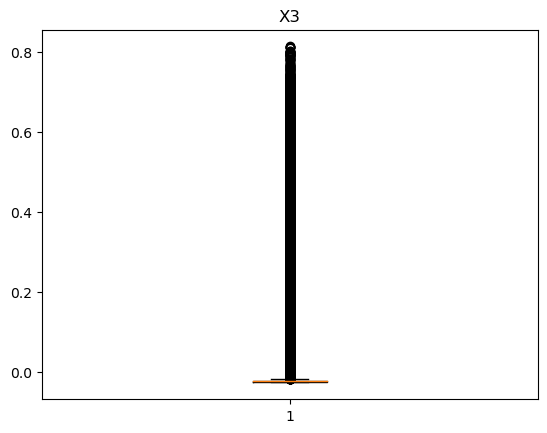

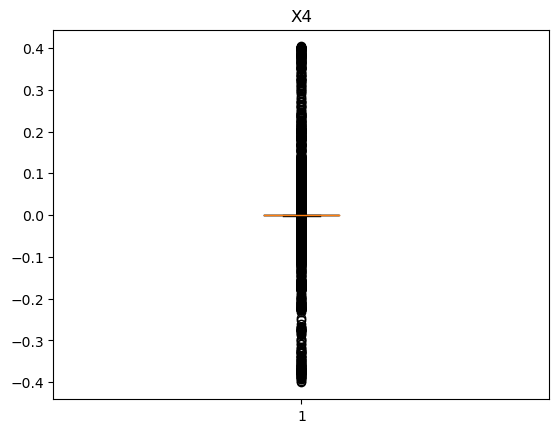

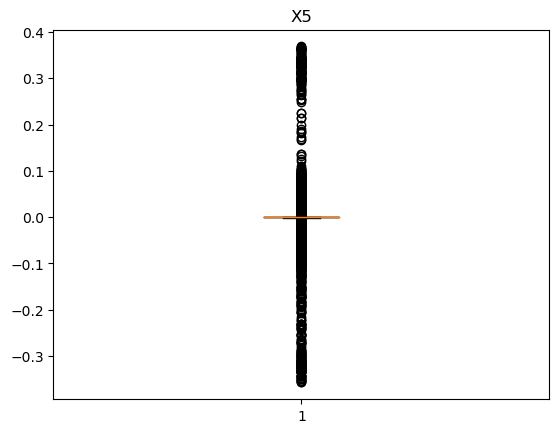

In [28]:
mlp.figure(figsize=(5,5))
for i in data1:
    mlp.boxplot(data1[i])
    mlp.title(i)
    mlp.show()

In [29]:
IQR=[]
IQR.append(data1["X1"].quantile(0.75)-data1["X1"].quantile(0.25))
IQR

[80203618.24999982]

In [30]:
UPPER=[]
IQR.append(data1["X1"].quantile(0.75)+(1.5)*IQR[0])
IQR

[80203618.24999982, 155474899.66410196]

In [31]:
LOWER=[]
IQR.append(data1["X1"].quantile(0.25)-(1.5)*IQR[0])
IQR

[80203618.24999982, 155474899.66410196, -165339573.33589733]

In [32]:
np.where(data1['X1']>155474899.66410196,155474899.66410196,np.where(data1['X1']<-165339573.33589733,-165339573.33589733,data1['X1']))

array([-76407758.96089712, -76105186.96089712, -75837996.96089712, ...,
        76618947.0391027 ,  76914248.0391027 ,  76932603.0391027 ])

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier() 
rfc_model.fit(x_train,y_train)

D:\Mini\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [34]:
rfcpred=rfc_model.predict(x_test)

In [35]:
rfcpred

array([19., 12., 19., ..., 11.,  2.,  4.])

In [36]:
y_test

array([[19.],
       [12.],
       [19.],
       ...,
       [11.],
       [ 2.],
       [ 4.]])

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy=accuracy_score(y_test,rfcpred)
cm=confusion_matrix(y_test,rfcpred)

In [38]:
accuracy

1.0

In [39]:
import pickle

In [40]:
pickle.dump(rfc_model,open("Genetic-classification.pkl","wb"))